# Heart Disease Prediction

*Going to predict heart disease with an UCI dataset from a hospital from Cleveland*

## Preparing the environment

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score,f1_score, plot_roc_curve

### Import Dataset

In [4]:
df = pd.read_csv('heart_disease.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
df.shape

(303, 14)

## Exploratory Data Analysis

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


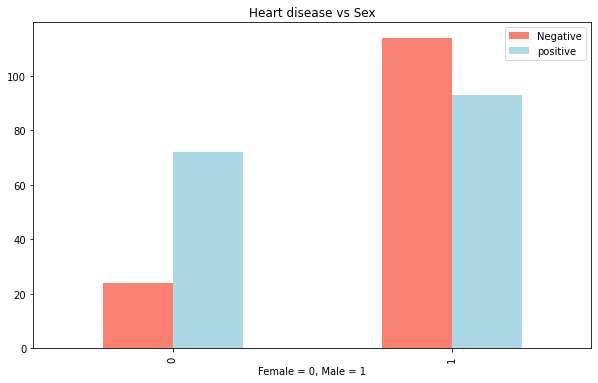

In [9]:
pd.crosstab(df.sex, df.target).plot(kind= 'bar',
                                    figsize= (10,6), 
                                    color= ['salmon', 'lightblue'])
plt.legend(labels = ["Negative","positive"])
plt.title("Heart disease vs Sex")
plt.xticks()
plt.xlabel("Female = 0, Male = 1");

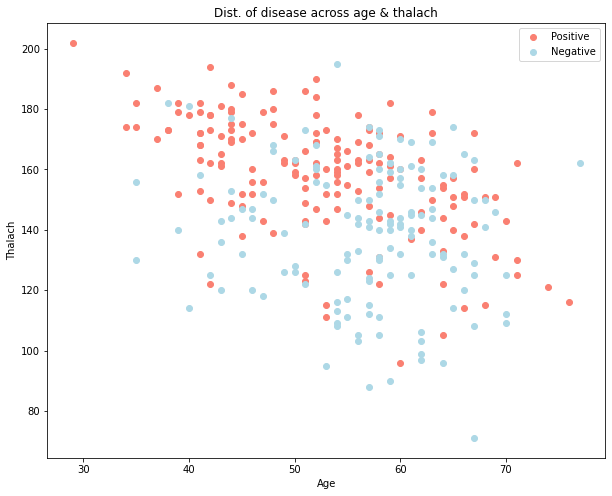

In [10]:
plt.figure(figsize= (10,8))

plt.scatter(df.age[df["target"]==1], df.thalach[df["target"]==1], color="salmon")
plt.scatter(df.age[df["target"]==0], df.thalach[df["target"]==0], color="lightblue")
plt.title("Dist. of disease across age & thalach")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Positive", "Negative"])
plt.show()

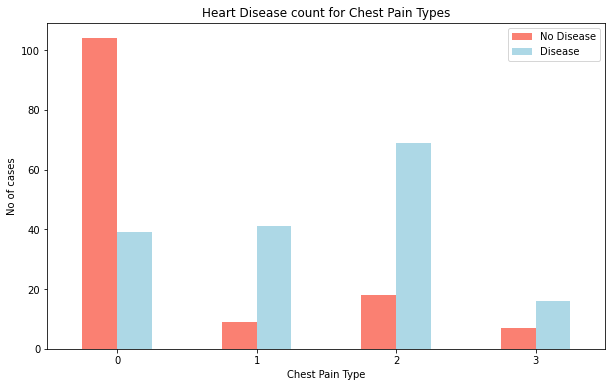

In [11]:
pd.crosstab(df.cp, df.target).plot(kind= 'bar',
                                  figsize= (10,6),
                                  color= ["salmon", "lightblue"])

plt.title("Heart Disease count for Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.legend(["No Disease", "Disease"])
plt.ylabel("No of cases")
plt.xticks(rotation= 0);

### Correlation trick

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


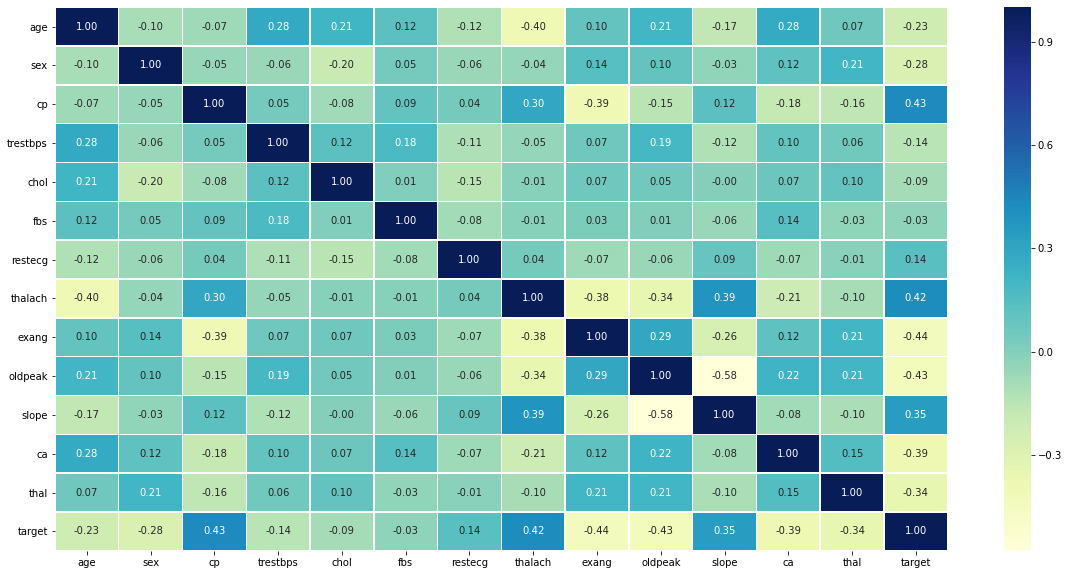

In [13]:
corr_df = df.corr()

fig, ax = plt.subplots(figsize= (20,10))
ax = sns.heatmap(corr_df, 
                annot = True,
                linewidths= 0.5,
                fmt= ".2f",
                cmap= "YlGnBu");

## Modelling

### Train/test split & scaling

In [14]:
X = df.drop("target", axis=1)

y = df["target"]

In [15]:
X.shape, y.shape

((303, 13), (303,))

In [16]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [18]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and scores a model with given model params and objects.
    models: dictionary of model objects
    X_train: Training data set with features
    X_test: Testing data with features
    y_train: Training target set
    y_test: Testing target set
    """
    
    #set random seed
    np.random.seed(42)
    
    #Dictionary to keep scores
    model_scores ={}
    
    #fit the models
    for name, model in models.items():
        #fit the model
        model.fit(X_train, y_train)
        
        #Evaluate the model and append scores to model_scores dict
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [19]:
model_scores = fit_score(models = models, 
                         X_train= X_train, 
                         X_test = X_test, 
                         y_train = y_train, 
                         y_test = y_test)

model_scores

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

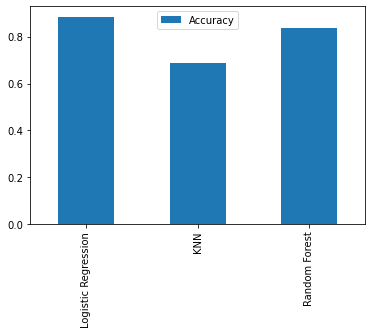

In [20]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])

model_compare.T.plot.bar();

## Hyper Parameter Tuning

### KNN Tune

In [23]:
#KNN Tuning

train_scores = []
test_scores = []

#Parameters
neighbors = range(1,21)

#KNN Object
knn = KNeighborsClassifier()

#Fit all values of neighbors in KNN
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


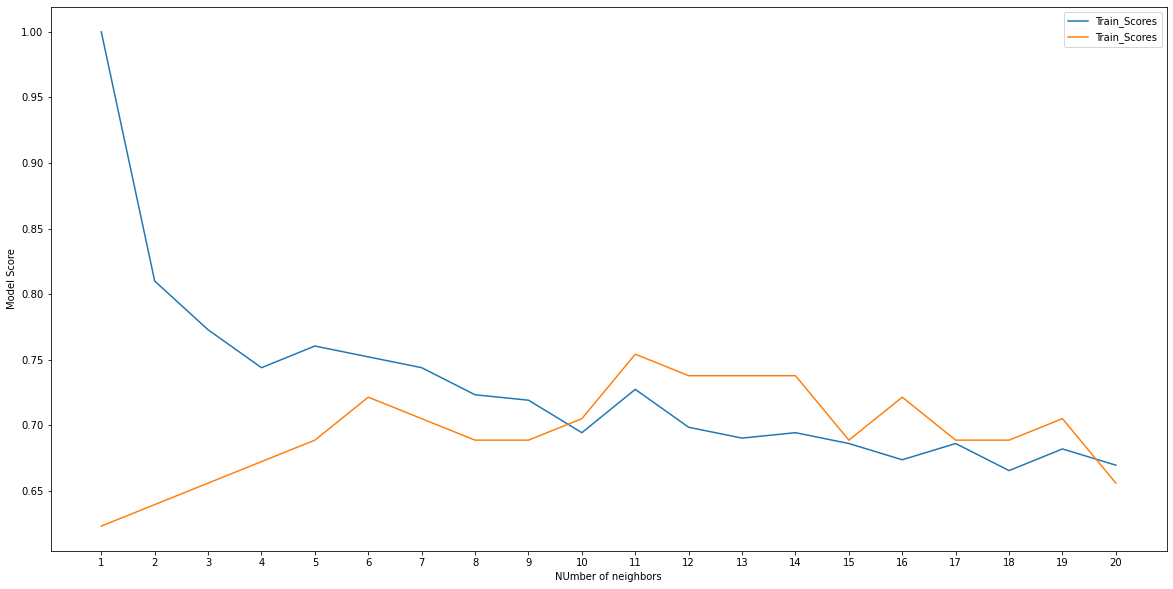

In [32]:
plt.figure(figsize= (20,10))
plt.plot(neighbors, train_scores, label= "Train_Scores")
plt.plot(neighbors, test_scores, label= "Train_Scores")

plt.xlabel("NUmber of neighbors")
plt.ylabel("Model Score")

plt.legend()
plt.xticks(range(1,21))

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Tuning with RandomizedSearchCV

In [33]:
#Log Reg Hyper Parameter Grid
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

#Random forest hyperparameter grid
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [34]:
#Tune Logistic Regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions= log_reg_grid, 
                                cv= 5, 
                                n_iter= 20, 
                                verbose = True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [39]:
#Tuning Random Forest Tuning
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [40]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [44]:
#Tuning Log Reg using GrdSearchCV
#Log Reg Hyper Parameter Grid
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear", "lbfgs" ],
               "penalty": ["l1", "l2", "elasticnet", "none"],
               "class_weight": [None, "balanced"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True,
                         n_jobs = -1)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   27.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.887...
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'class_weight

In [45]:
gs_log_reg.best_params_

{'C': 0.20433597178569418,
 'class_weight': None,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [47]:
#Evaluating models using other metrics

y_preds = gs_log_reg.predict(X_test)

<Figure size 576x576 with 0 Axes>

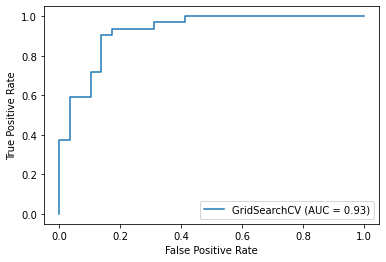

In [49]:
plt.figure(figsize=(8,8))
plot_roc_curve(gs_log_reg, X_test, y_test)

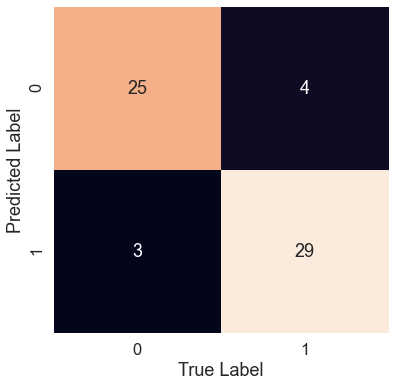

In [57]:
#confusion_matrix(y_test, y_preds)

#sns.set(font_scale= 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots confusion matrix using sns.heatmap()
    y_test: True Y Value
    y_preds: predicted Y value
    """
    fig, ax = plt.subplots(figsize= (6,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Cross validation - Evaluation

In [58]:
from sklearn.model_selection import cross_val_score

In [60]:
#Check best hyperparametes for Log Reg
gs_log_reg.best_params_

{'C': 0.20433597178569418,
 'class_weight': None,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [63]:
clf = LogisticRegression(C= 0.20433597178569418, 
                         class_weight= None, penalty= 'l2', solver= 'liblinear')

In [65]:
cv_acc = (cross_val_score(clf, X, y, cv= 5, scoring = "accuracy")).mean()
cv_acc

0.8446994535519124

In [66]:
cv_pre = (cross_val_score(clf, X, y, cv= 5, scoring = "precision")).mean()
cv_pre

0.8207936507936507

In [67]:
cv_rec = (cross_val_score(clf, X, y, cv= 5, scoring = "recall")).mean()
cv_rec

0.9212121212121213

In [68]:
cv_f1 = (cross_val_score(clf, X, y, cv= 5, scoring = "f1")).mean()
cv_f1

0.8673007976269721

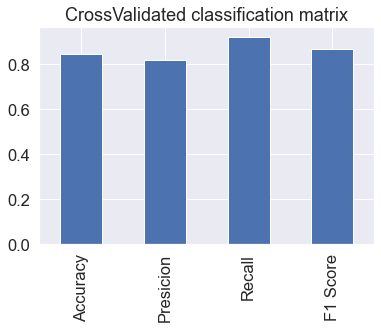

In [73]:
#Visualize cross validated metrics
cv_metrics= pd.DataFrame({"Accuracy": cv_acc,
                         "Presicion": cv_pre,
                         "Recall": cv_rec,
                         "F1 Score": cv_f1}, index = [0])
cv_metrics.T.plot.bar(title= "CrossValidated classification matrix", legend = False);

In [75]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [84]:
feature_dict = pd.DataFrame(dict(zip(df.columns, list(clf.coef_[0]))), index=[0])

<Figure size 720x720 with 0 Axes>

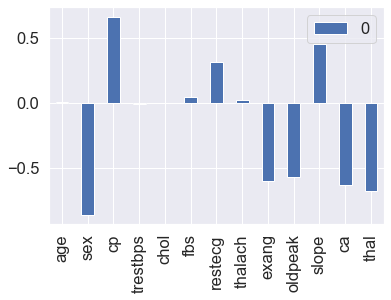

In [89]:
plt.figure(figsize=(10,10))
feature_dict.T.plot.bar();tyhru?><